# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Hypertension Prediction</p>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p> 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p> 

In [2]:
original_data = pd.read_csv("hypertension_dataset.csv")
df = original_data.copy()
df.head()

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p> 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

In [4]:
df.isna().sum()

Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

In [5]:
#There is no missing values in the data.

In [6]:
df.head()

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


In [7]:
#Let's take a look at the categorical columns:
cat_columns = df.dtypes == "object"
cat_columns = list(cat_columns[cat_columns].index)
df[cat_columns]

,Country,Smoking_Status,Physical_Activity_Level,Family_History,Diabetes,Gender,Education_Level,Employment_Status,Hypertension
0,UK,Never,Low,Yes,Yes,Female,Primary,Unemployed,High
1,Spain,Never,High,Yes,Yes,Male,Secondary,Unemployed,High
2,Indonesia,Current,High,Yes,Yes,Male,Primary,Employed,Low
3,Canada,Never,Moderate,Yes,Yes,Female,Secondary,Retired,High
4,France,Never,Moderate,Yes,No,Female,Primary,Employed,High
...,...,...,...,...,...,...,...,...,...
174977,India,Never,Low,Yes,Yes,Female,Tertiary,Employed,Low
174978,Australia,Never,Moderate,Yes,No,Female,Primary,Employed,High
174979,India,Former,Low,Yes,No,Male,Secondary,Employed,High
174980,Germany,Never,High,No,Yes,Male,Primary,Retired,High


In [8]:
#I am removing the columns below because I think they are not meaningful data for data training.
df = df.drop(["Country","Education_Level","Employment_Status"], axis = 1)

In [9]:
#Now, let's try to detect outliers for numerical values:
df.describe()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,14.991069,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187
std,20.786353,7.213866,43.361589,26.019268,17.310789,8.652624,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,7.500000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,15.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,22.500000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,30.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000


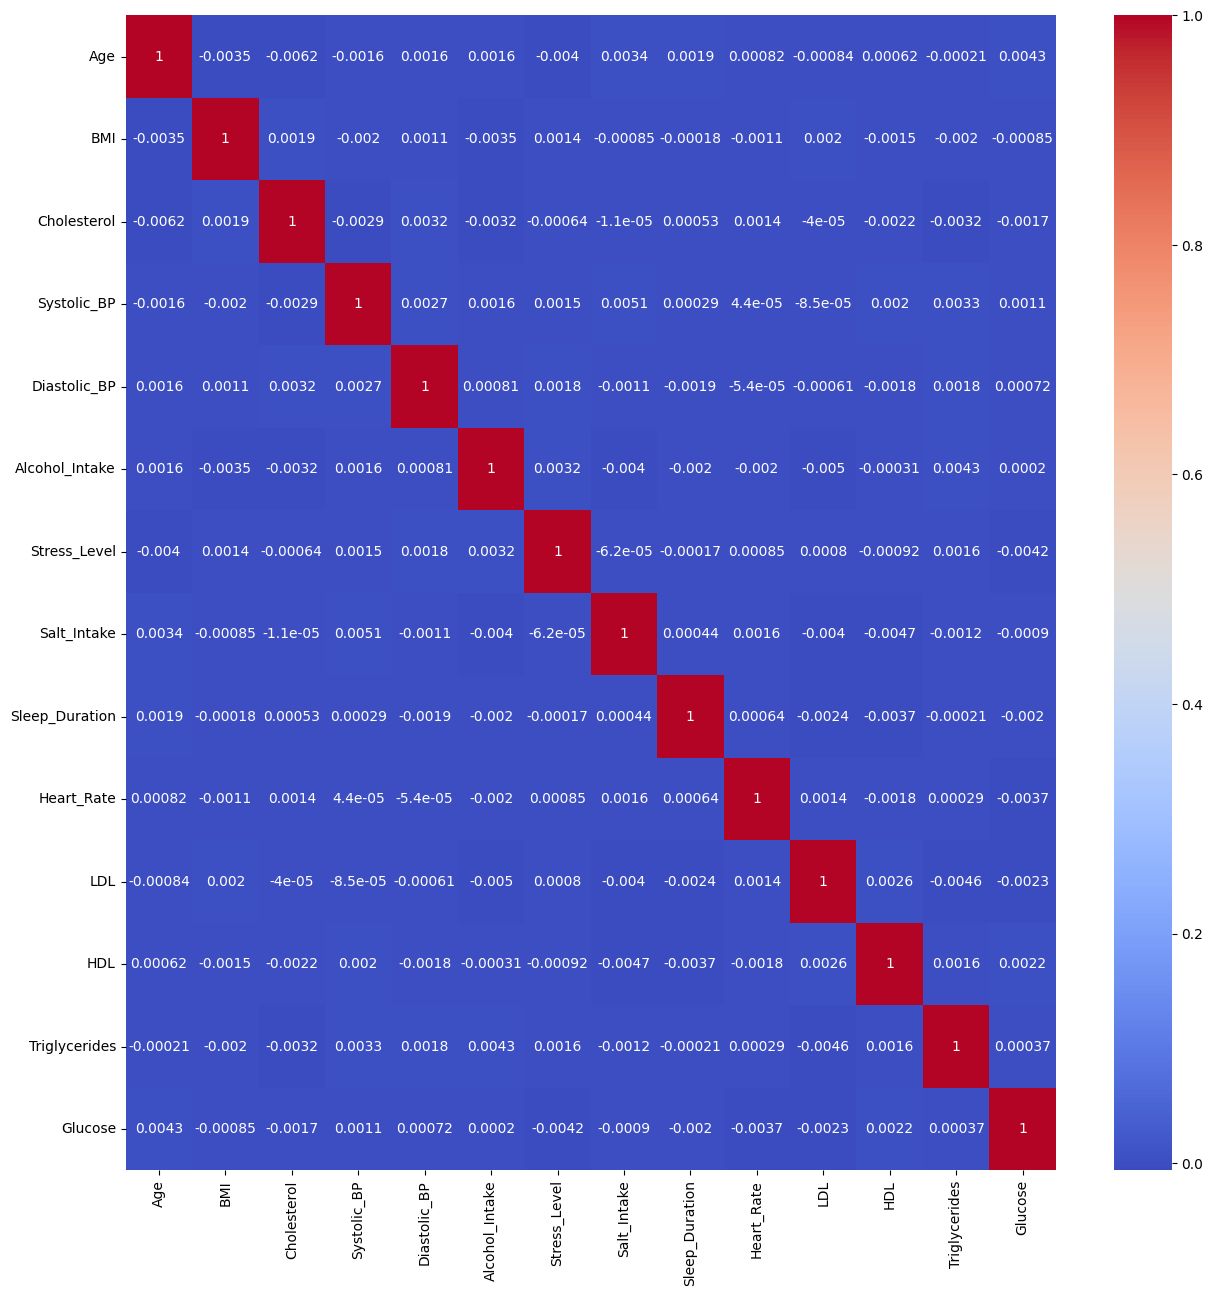

In [10]:
#No outliers appear. Let's take a look at the confusion matrix of numerical values:
num_columns = (df.dtypes == "float64") | (df.dtypes == "int64") 
num_columns = np.array(num_columns[num_columns].index)
corr = df[num_columns].corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap = 'coolwarm',annot = True)
plt.show()

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p> 

In [11]:
#Let's apply Label Encoding for categorical values:
df['Hypertension'] = df['Hypertension'].replace({"High":1,"Low":0})

In [12]:
cat_columns = df.dtypes == "object"
cat_columns = list(cat_columns[cat_columns].index)
LE = LabelEncoder()
for i in cat_columns:
    df[i]= LE.fit_transform(df[i])

In [13]:
df.head()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,Diabetes,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Hypertension
0,58,29.5,230,160,79,2,27.9,1,1,1,9,14.7,6.1,80,100,75,72,179,0,1
1,34,36.2,201,120,84,2,27.5,0,1,1,6,10.8,9.8,56,77,47,90,113,1,1
2,73,18.2,173,156,60,0,1.8,0,1,1,5,6.5,5.2,75,162,56,81,101,1,0
3,60,20.3,183,122,94,2,11.6,2,1,1,6,4.0,7.5,71,164,93,94,199,0,1
4,73,21.8,296,91,97,2,29.1,2,1,0,6,8.4,5.0,52,108,74,226,157,0,1


In [34]:
#Currently all values are numerical. I will standardize the data with Standard Scaler.

In [15]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,Diabetes,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Hypertension
0,0.216810,0.277983,0.125934,0.979845,-0.603690,1.230491,1.491914,0.001638,1.0,1.002827,1.543936,1.657904,-0.517972,0.381266,-0.852539,0.516423,-1.342856,1.186135,-0.997899,0.625431
1,-0.937797,1.206753,-0.542863,-0.557482,-0.314852,1.230491,1.445685,-1.222923,1.0,1.002827,0.382196,0.617921,1.619859,-1.280953,-1.516594,-0.870360,-1.031247,-0.572609,1.002105,0.625431
2,0.938440,-1.288449,-1.188598,0.826112,-1.701274,-1.220978,-1.524521,-1.222923,1.0,1.002827,-0.005050,-0.528726,-1.037985,0.034970,0.937522,-0.424609,-1.187051,-0.892381,1.002105,-1.598897
3,0.313027,-0.997342,-0.957978,-0.480616,0.262824,1.230491,-0.391913,1.226199,1.0,1.002827,0.382196,-1.195382,0.290937,-0.242067,0.995266,1.407927,-0.962001,1.719088,-0.997899,0.625431
4,0.938440,-0.789409,1.648022,-1.672044,0.436127,1.230491,1.630600,1.226199,1.0,-0.997181,0.382196,-0.022068,-1.153544,-1.557990,-0.621563,0.466895,1.323126,0.599887,-0.997899,0.625431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174977,-0.119950,1.650344,0.956164,1.517909,-0.430387,1.230491,-0.542157,0.001638,1.0,1.002827,0.382196,1.444574,1.446521,1.489412,1.226242,0.367839,-0.858132,-1.052267,-0.997899,-1.598897
174978,1.708178,1.594895,0.425739,-1.172413,0.262824,1.230491,-0.900431,1.226199,1.0,-0.997181,0.382196,-0.982052,-0.460193,-0.796140,-1.401106,0.070671,-0.165669,-0.279485,-0.997899,0.625431
174979,-0.504819,1.248339,0.956164,-0.980247,0.493895,0.004756,0.914053,0.001638,1.0,-0.997181,1.156690,0.324593,1.735417,-0.865399,0.273467,-1.266584,-0.979313,-1.691810,1.002105,0.625431
174980,-0.264276,-1.274587,1.601898,-0.019418,-0.314852,1.230491,0.035704,-1.222923,-1.0,1.002827,1.156690,-0.208732,-1.326881,-1.488731,-0.506075,-1.365640,-1.602529,-1.265448,1.002105,0.625431


[0.05087327 0.10167048 0.1523892  0.20286519 0.25329555 0.3036069
 0.35386246 0.40405267 0.45415635 0.50419084 0.55415979 0.60398259
 0.6537569  0.70347823 0.75312777 0.80273425 0.85230357 0.90165471
 0.95086754 1.        ]


<Axes: >

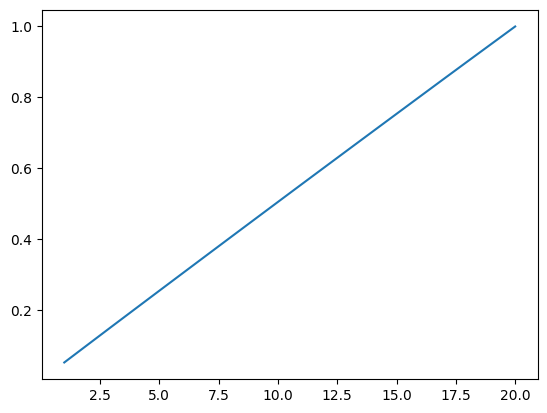

In [16]:
#First of all, we will use explained variance ratio to determine how many columns can adequately represent our data.
#Later, we will apply dimensionality reduction to data with PCA.
pca = PCA()
pca.fit(scaled_df)
cum_dim = np.array(pca.explained_variance_ratio_).cumsum()
print(cum_dim)
sns.lineplot(x=(range(1,len(cum_dim)+1)),y = cum_dim)

In [17]:
'''We can only reach a representation rate of over 95% in the 19th dimension. The data already has 20 dimensions and columns.
Considering that, I decided that there was no need to reduce the dimension.'''

'We can only reach a representation rate of over 95% in the 19th dimension. The data already has 20 dimensions and columns.\nConsidering that, I decided that there was no need to reduce the dimension.'

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">APPLY MODEL</p> 

In [18]:
X = df.drop("Hypertension",axis = 1)
y = df[["Hypertension"]]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [20]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [21]:
classifier = AdaBoostClassifier(n_estimators=100,random_state=42)

In [22]:
classifier = classifier.fit(X_train,y_train)

In [23]:
y_predict = classifier.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_predict)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_predict)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_predict)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7185
Precision: 0.7185
Recall: 1.0000
F1-Score: 0.8362


In [25]:
#Recall being 1 made us suspect that there was an imbalance in the data:

<Axes: xlabel='Hypertension', ylabel='count'>

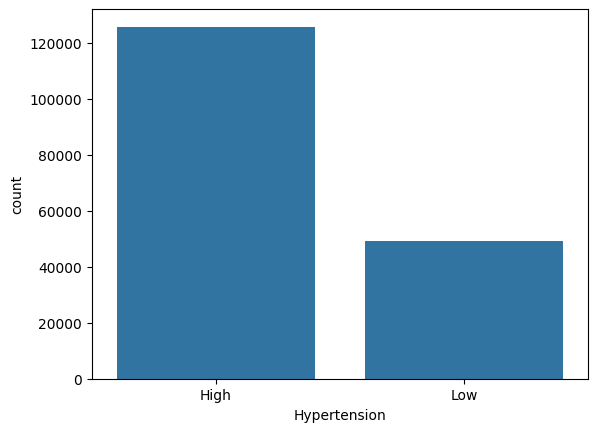

In [26]:
df2 = original_data.copy()
sns.countplot(x =df2["Hypertension"])

In [27]:
#First, let's try to retrain and evaluate the model by adjusting the classweights parameter:

In [28]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
classifier = AdaBoostClassifier(estimator = tree,n_estimators=100,random_state=42)

In [29]:
classifier = classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_predict)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_predict)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_predict)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.5928
Precision: 0.7170
Recall: 0.7158
F1-Score: 0.7164


In [30]:
#Our Accuracy value decreased, but we obtained a more balanced model.
#Let's retrain the model by oversampling our minority data using SMOTE (Synthetic Minority Over-sampling Technique).

In [31]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print(f"Class distribution in the original data set: {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"Class distribution in the dataset after SMOTE: {dict(zip(*np.unique(y_res, return_counts=True)))}")

Class distribution in the original data set: {np.int64(0): np.int64(34425), np.int64(1): np.int64(88062)}
Class distribution in the dataset after SMOTE: {np.int64(0): np.int64(88062), np.int64(1): np.int64(88062)}


In [32]:
classifier = AdaBoostClassifier(n_estimators=100,random_state=42)
classifier.fit(X_res, y_res)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.5618
Precision: 0.7220
Recall: 0.6345
F1-Score: 0.6754
